# Imports and dataset loading

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from keras.layers import Dense

import pandas as pd

layerArray = [2, 4, 8, 16, 32]
gainArray  = []
lossArray  = []

originalDataSet = pd.read_csv('dataset', sep=',',header = None)
scaler = MinMaxScaler()

def loadDataset():    
    scaler.fit(originalDataSet.sample(frac=1).values.reshape(-1, 1))
    dataSet = scaler.transform(originalDataSet.values) 
    
    features, result = np.array(dataSet[:, :4]), np.array(dataSet[:, 4:])
    return features, result

def invertNorm(value):
    auxArray = np.array([value, 0, 0, 0, 0, 0]).reshape(-1, 1)
    return scaler.inverse_transform(auxArray)[0][0]
    
def getError(value1, value2):
    return abs(invertNorm(value1) - invertNorm(value2))

# Cross validation function

In [8]:
def crossValidate(regressor, layers, features, result, folds = 5):
    foldSize   = math.ceil(features.shape[0] / folds)
    gainErrors = []
    lossErrors = []
    
    for i in range(folds): 
        sliceBegin = i * foldSize
        sliceEnd   = (i + 1) * foldSize
        
        X_train = np.delete(features, np.s_[sliceBegin: sliceEnd], 0)
        y_train = np.delete(result, np.s_[sliceBegin: sliceEnd], 0)
        
        regressor.fit(X_train, y_train)    
            
        X_test = features[sliceBegin: sliceEnd]
        y_test = result[sliceBegin: sliceEnd]
        
        gainError = 0
        lossError = 0
        
        prediction = regressor.predict(X_test)
        
        for predicted, expected in zip(prediction, y_test):
            gainError += getError(predicted[0], expected[0])
            lossError += getError(predicted[1], expected[1])
            
        gainErrors.append(gainError / foldSize)
        lossErrors.append(lossError / foldSize)

        #regressor = setANN(layers)

    return np.array(gainErrors), np.array(lossErrors)

In [9]:
def trainModel(strategy, layers):    
    features, result       = loadDataset()
    gainErrors, lossErrors = crossValidate(strategy, layers, features, result)

    print(gainErrors, "=> %0.2f (+/- %0.2f)" % (np.mean(gainErrors), gainErrors.std() * 2))
    print(lossErrors, "=> %0.2f (+/- %0.2f)" % (np.mean(lossErrors), lossErrors.std() * 2))
    print()
    
    gainArray.append(np.mean(gainErrors))
    lossArray.append(np.mean(lossErrors))

def setSequential(layers):
    model = Sequential()
    
    model.add(Dense(4, input_dim = 4, kernel_initializer = 'normal', activation = 'sigmoid'))
    
    if layers == 2:
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
    elif layers == 4:
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(4, kernel_initializer = 'normal', activation = 'sigmoid'))  
    elif layers == 8:
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))  
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(4, kernel_initializer = 'normal', activation = 'sigmoid')) 
    elif layers == 16:
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))  
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid')) 
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))  
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(4, kernel_initializer = 'normal', activation = 'sigmoid'))
    else:
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))  
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))  
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid')) 
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(128, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(128, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(128, kernel_initializer = 'normal', activation = 'sigmoid')) 
        model.add(Dense(128, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))  
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(32, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(8, kernel_initializer = 'normal', activation = 'sigmoid'))
        model.add(Dense(4, kernel_initializer = 'normal', activation = 'sigmoid')) 
    
    model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def setMLP(layers):
    if layers == 2:
        return MLPRegressor(hidden_layer_sizes = (8, 8), activation = 'identity', solver = 'lbfgs', learning_rate = 'constant', alpha = 0.001, random_state = 0)
    
    if layers == 4:
        return MLPRegressor(hidden_layer_sizes = (8, 16, 8, 4), activation = 'identity', solver = 'lbfgs', learning_rate = 'constant', alpha = 0.001, random_state = 0)
    
    if layers == 8:
        return MLPRegressor(hidden_layer_sizes = (8, 16, 32, 64, 32, 16, 8, 4), activation = 'identity', solver = 'lbfgs', learning_rate = 'constant', alpha = 0.001, random_state = 0)
    
    if layers == 16:
        return MLPRegressor(hidden_layer_sizes = (8, 16, 16, 32, 32, 64, 64, 64, 64, 32, 32, 16, 16, 8, 8, 4), activation = 'identity', solver = 'lbfgs', learning_rate = 'constant', alpha = 0.001, random_state = 0)
    
    if layers == 32:
        return MLPRegressor(hidden_layer_sizes = (8, 8, 16, 16, 16, 16, 32, 32, 32, 32, 64, 64, 64, 64, 128, 128, 128, 128, 64, 64, 64, 64, 32, 32, 32, 32, 16, 16, 16, 16, 8, 4), activation = 'identity', solver = 'lbfgs', learning_rate = 'constant', alpha = 0.001, random_state = 0)


# Plotting functions

In [10]:
def plotGainError():
    fig7, axis = plt.subplots(figsize = (10, 5))

    axis.plot(layerArray, gainArray, 'sb-')
    axis.set_title("Gain error")
    axis.set_ylabel("Absolute error")
    axis.set_ylabel("Max depth")
    #axis.legend(strategyArray)

    plt.show()

In [11]:
def plotLossError():
    fig7, axis = plt.subplots(figsize = (10, 5))

    axis.plot(layerArray, lossArray, 'or--')
    axis.set_title("Loss error")
    axis.set_ylabel("Absolute error")
    axis.set_ylabel("Max depth")
    #axis.legend(strategyArray)

    plt.show()

# Putting all together

In [12]:
for layers in layerArray:
    regressor = setMLP(layers)
    trainModel(regressor, layers)

print("Done!")

[3.17514131 2.94840833 2.71131848 2.98501369 2.78416147] => 2.92 (+/- 0.33)
[2.06649399 1.6872527  1.93387631 1.65965917 1.18949854] => 1.71 (+/- 0.60)

[3.18667094 3.0285457  2.71051088 2.95269348 2.75038519] => 2.93 (+/- 0.35)
[2.11213078 1.70587983 1.95241829 1.51387515 1.42978777] => 1.74 (+/- 0.52)

[3.23741606 3.01279996 2.7837821  2.95422181 2.74309138] => 2.95 (+/- 0.35)
[2.16513263 1.61941853 1.94604224 1.57740567 2.45659704] => 1.95 (+/- 0.66)

[2.90167569 2.89917048 2.6439736  2.91287429 2.90219045] => 2.85 (+/- 0.21)
[2.07448712 1.60945643 1.92630986 1.52570191 1.37274716] => 1.70 (+/- 0.52)

[3.40840274 3.03065126 2.8428963  2.97441443 2.84413824] => 3.02 (+/- 0.42)
[2.09115849 1.66105795 1.9302707  1.58284826 1.38957097] => 1.73 (+/- 0.50)

Done!


# Plotting graphs

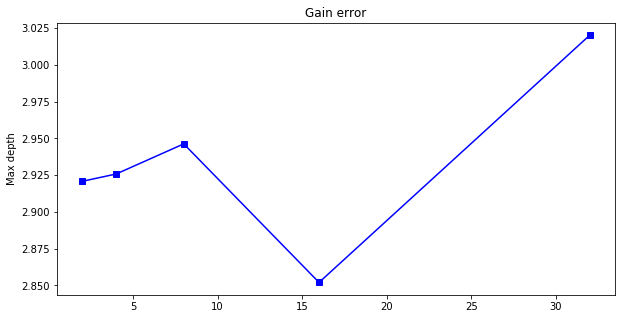

In [13]:
plotGainError()

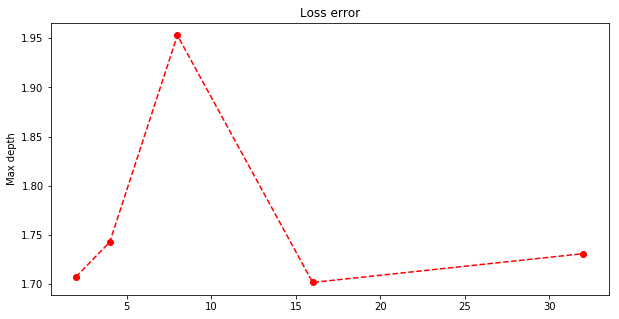

In [14]:
plotLossError()